* name - name of the listing
* host_id - host ID
* host_name - name of the host
* neighbourhood_group - location
* neighbourhood - area
* latitude - latitude coordinates
* longitude - longitude coordinates
* room_type - listing space type
* price - price in dollars
* minimum_nights - amount of nights minimum
* number_of_reviews - number of reviews
* last_review - latest review
* reviews_per_month - number of reviews per month
* calculated_host_listings_count - amount of listing per host
* availability_365 - number of days when listing is available for booking

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

df = pd.read_csv("AB_NYC_2019.csv")
n = df.shape[0]
print("Size of dataframe: " + str(n) +"\n")

df.drop(["id","name","host_id","host_name"], axis=1, inplace=True)

df.head()

Size of dataframe: 48895



,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<br>

---
<h3>2. Data Preprocessing and Visualization</h3>

<h4>2.1 last review</h4>

We grouped the dates for visualization:

In [ ]:
date = list(map(lambda x: x, df["last_review"])) 

sns.boxplot(date, df["price"])
plt.xlabel("Date")
plt.show()

<h4>2.1 neighbourhood</h4>

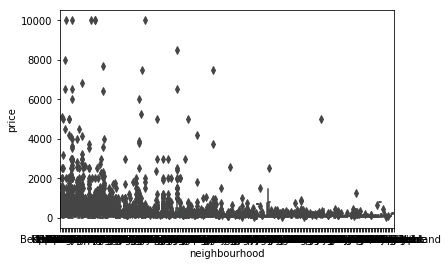

In [3]:
neighb = list(map(lambda x: x, df["neighbourhood"])) 

sns.boxplot(neighb, df["price"])
plt.xlabel("neighbourhood")
plt.show()

location

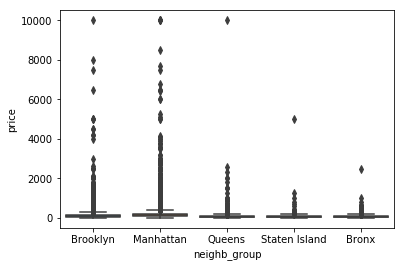

In [4]:
neighb_group = list(map(lambda x: x, df["neighbourhood_group"])) 

sns.boxplot(neighb_group, df["price"])
plt.xlabel("neighb_group")
plt.show()

Pearson Correlation of Numerical Features

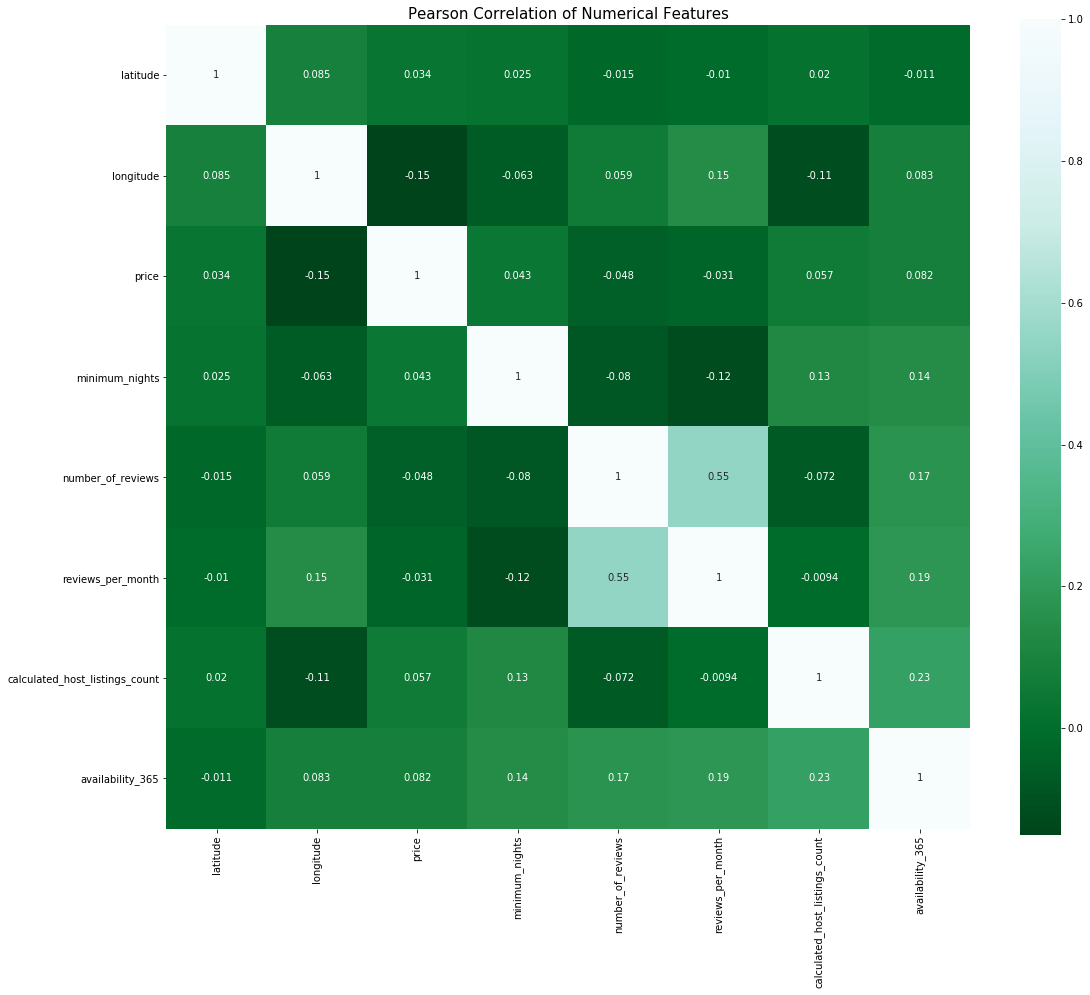

In [5]:
features_numerical = list(df)

plt.subplots(figsize=(18, 15))
sns.heatmap(df[features_numerical].corr(), vmax=1.0, square=True, cmap="BuGn_r", annot=True)
plt.title("Pearson Correlation of Numerical Features", fontsize=15)
plt.show()

Data mining

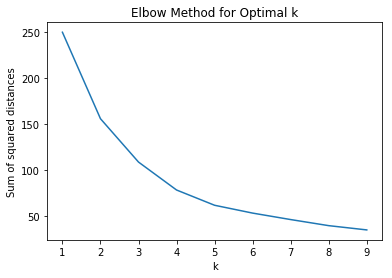

In [6]:
coordinates = df[["latitude", "longitude"]]

sum_squared_distances = []
K = range(1,10)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(coordinates)
    sum_squared_distances.append(km.inertia_)

plt.plot(K, sum_squared_distances)
plt.title("Elbow Method for Optimal k")
plt.xlabel("k")
plt.ylabel("Sum of squared distances")
plt.show()

In [7]:
km = KMeans(n_clusters=8).fit(coordinates)
centroids = km.cluster_centers_
print(centroids)

[[ 40.72737434 -73.98750784]
 [ 40.75508629 -73.90541869]
 [ 40.77374032 -73.97016514]
 [ 40.69533235 -73.93398018]
 [ 40.82839104 -73.93249449]
 [ 40.66090309 -73.97122603]
 [ 40.70021097 -73.80270097]
 [ 40.61359728 -74.08475687]]


In [8]:
clusters = []

for x, y in zip(df["latitude"], df["longitude"]):
  distance_min = float("inf")
  cluster = -1
  for i in range(len(centroids)):
    xx = centroids[i][0]
    yy = centroids[i][1]
    distance = np.sqrt((x - xx)**2 + (y - yy)**2)
    if distance < distance_min:
      distance_min = distance
      cluster = i
  clusters.append(cluster)

KeyboardInterrupt: 

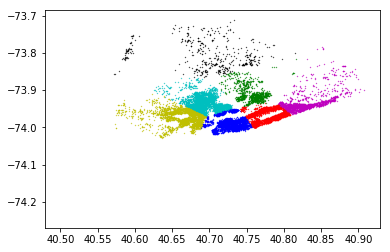

In [9]:
colors = ["b", "g", "r","c","m","y","k","w"]
for i in range(n):
  plt.scatter(df["latitude"][i], df["longitude"][i], c=colors[clusters[i]], s=0.1)

plt.scatter(centroids[:,0], centroids[:,1], marker="+", c="black", s=100)
plt.title("Clusters and Centroids of Coordinates")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

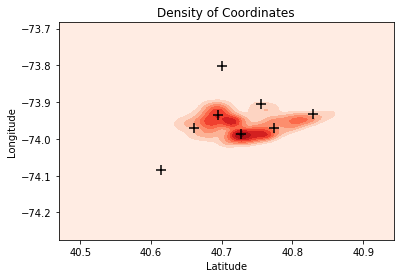

In [10]:
sns.kdeplot(df["latitude"], df["longitude"], cmap="Reds", shade=True, shade_lowest=True, bw=.01)
plt.scatter(centroids[:,0], centroids[:,1], marker="+", c="black", s=100)
plt.title("Density of Coordinates")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [11]:
dummies = pd.get_dummies(clusters, prefix="region")
df = pd.concat([df, dummies], axis=1)
df.drop(["latitude", "longitude"], axis=1, inplace=True)
df.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,region_0,region_1,region_2,region_3,region_4,region_5,region_6,region_7
0,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365,0,0,0,0,0,1,0,0
1,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0,0,1,0,0,0,0,0
2,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365,0,0,0,0,1,0,0,0
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0,0,0,0,0,1,0,0
4,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0,0,0,0,1,0,0,0


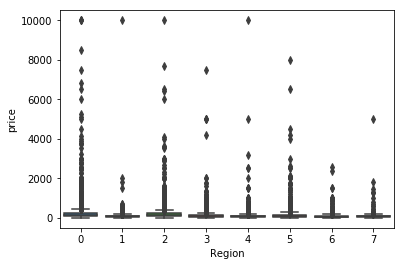

In [12]:
sns.boxplot(clusters, df["price"])
plt.xlabel("Region")
plt.show()

data mining

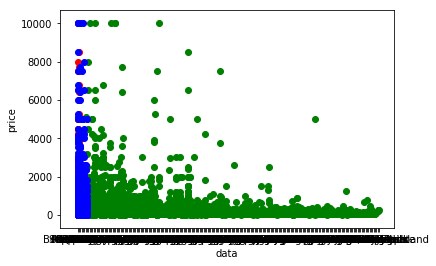

In [27]:
plt.scatter( df["neighbourhood_group"],df["price"], color='r')
plt.scatter(df["neighbourhood"],df["price"],  color='g')
plt.scatter( clusters,df["price"], color='b')
plt.xlabel('data')
plt.ylabel('price')
plt.show()

Evalution

In [ ]:
Conclusion